In [1]:
import gymnasium as gym
import pygame
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import shapely.plotting
import numpy as np
# import geopandas as gpd
import random
import io
import PIL
import tqdm

from gymnasium.wrappers import FlattenObservation, FilterObservation

from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.env_util import make_vec_env

from env import NetworkEnv

plt.ioff()

In [2]:
x_max = y_max = 100

In [3]:
def display_video_random(model, env, steps=1000):
    frames = []  # To store frames

    obs, _ = env.reset()
    # env.robots = np.random.randint(0, 100, (8, 2))
    rew = []

    t1 = t2 = False
    # while not t1 and not t2:
    for i in tqdm.trange(steps):
        frame = env.render()
        # plt.imshow(frame)
        # plt.axis('off')
        # plt.show()
        # break
        frames.append(frame)
        action, _ = model.predict(obs)
        obs, a, t1, t2, _ = env.step(action)
        
        rew.append(a)
        if t1 or t2:
            break
    env.close()

    # Plotting setup
    fig, ax = plt.subplots()
    ax.axis("off")  # No axes for video display
    im = ax.imshow(frames[0])

    # Update function for animation
    def update(frame):
        im.set_data(frame)
        return [im]

    # Create animation
    ani = FuncAnimation(fig, update, frames=frames, blit=True)
    plt.close()  # Prevents an additional empty plot from displaying
    
    print(f"Total reward: {sum(rew)}")
    return ani.to_jshtml(), rew

In [4]:
env = NetworkEnv(8, (0, x_max), (0, y_max), step=1, radius=20, render_mode="rgb_array")
check_env(env)

/common/home/sj1030/miniconda3/envs/rl/lib/python3.9/site-packages/stable_baselines3/common/env_checker.py:263: UserWarning: Your observation robots has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(


In [5]:
n_envs = 10
n = 8
x_min = 0
x_max = 100
y_min = 0
y_max = 100
step = 1
radius = 20
render_mode = "rgb_array"
max_ep_len = 5000
bonus_threshold = 0.9
bonus_reward = 1000
overlap_threshold = 0.1

In [6]:
def get_env(train=False):
    return NetworkEnv(
    n,
    (x_min, x_max),
    (y_min, y_max),
    step=step,
    radius=radius,
    render_mode=render_mode,
    max_ep_len=max_ep_len,
    bonus_threshold=bonus_threshold,
    bonus_reward=bonus_reward,
    overlap_threshold=overlap_threshold,
    train=train
)

In [7]:
env = get_env(train=True)

In [8]:
# env.render()

In [ ]:
env = make_vec_env(get_env, n_envs=10)

In [ ]:
env.num_envs

In [ ]:
# env.reset()
# frame = env.render()
# plt.imshow(frame)
# plt.show()
# plt.axis('off')

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.logger import Logger


class EpisodicRewardLogger(BaseCallback):
    def __init__(self, verbose=0):
        super(EpisodicRewardLogger, self).__init__(verbose)
        self.episodic_rewards = []
        self.ep_len = []
        self.infos = []

    def _on_step(self) -> bool:
        # print(self.locals)
        self.infos.append(self.locals)
        info = self.locals["infos"][0]
        # print(info)
        if "episode" in info:
            self.episodic_rewards.append(info["episode"]["r"])
            self.ep_len.append(info["episode"]["l"])
        return True
        # # Retrieve the latest ep_rew_mean from the logger
        # latest_ep_rew_mean = self.logger.get_log_dict().get('rollout/ep_rew_mean', None)
        # latest_ep_len_mean = self.logger.get_log_dict().get('rollout/ep_len_mean', None)
        # if latest_ep_rew_mean is not None:
        #     self.episodic_rewards.append(latest_ep_rew_mean)
        # return True

In [ ]:
model1 = PPO("MultiInputPolicy", env, verbose=0)#, tensorboard_log="tensorboard_logs/")
model1.learn(
    total_timesteps=100,
    # callback=EpisodicRewardLogger(),
    # tb_log_name="ppo1",
    progress_bar=True,
    reset_num_timesteps=False,
)

# model1.save("ppo1")

In [ ]:
model1 = PPO("MultiInputPolicy", env, verbose=0, tensorboard_log="tensorboard_logs/")
model1.load("logs/best_model/best_model")

In [ ]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
a, rew = display_video_random(model1, get_env(train=False), steps=10000)
HTML(a)

In [ ]:
plt.plot(rew)

In [ ]:
./logs/best_model

In [ ]:
print(env.num_envs)
model2 = PPO("MultiInputPolicy", env, verbose=0, tensorboard_log="tensorboard_logs/")
model2.learn(
    total_timesteps=1000,
    callback=EpisodicRewardLogger(),
    tb_log_name="ppo1",
    progress_bar=True,
    reset_num_timesteps=False,
)

model1.save("ppo1")

In [ ]:
model1.predict(env.reset()[0])

In [ ]:
env.observation_space().sample(), env.action_space().sample()

In [ ]:
env.robots = np.array([[1, 1], [2, 2], [3, 3]])
env.render()

In [ ]:
random.randint(0, 9)

('reward 1.6584750952905511',
 'area 6642.482216541031',
 'contiguous True',
 'ratio 0.6642482216541031')

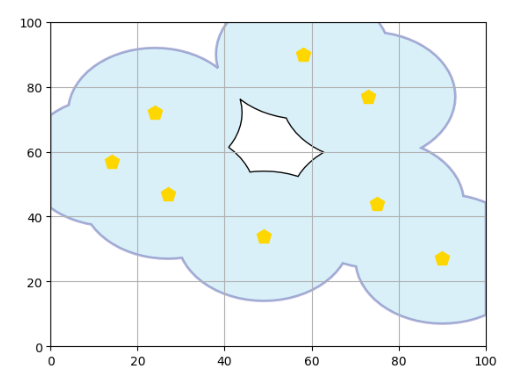

In [53]:
env.reset()
plt.imshow(env.render())
plt.axis('off')
a, b, c, d, e = env.get_reward()
"reward "+str(a), "area "+str(c.area), "contiguous "+str(d), "ratio "+str(e)

In [21]:
c

shapely.geometry.multipolygon.MultiPolygon

In [25]:
list(c.geoms)[0].geoms

AttributeError: 'Polygon' object has no attribute 'geoms'